In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [14]:
# Obtain the x and y coordinates for each of the three city types

ride_count = pyber_data.groupby(by="city")["ride_id"].count()

average_fare = round(pyber_data.groupby(by="city")["fare"].mean(),2)

driver_count = pyber_data.groupby(by="city")["driver_count"].sum()

Type = pyber_data.drop_duplicates("city", keep="first").set_index("city")["type"]

Scatter = pd.DataFrame({"x":ride_count,"y":average_fare,"z":driver_count, "City Type":Type})
Scatter

,x,y,z,City Type
Amandaburgh,18,24.64,216,Urban
Barajasview,22,25.33,572,Urban
Barronchester,16,36.42,176,Suburban
Bethanyland,18,32.96,396,Suburban
Bradshawfurt,10,40.06,70,Rural
Brandonfort,19,35.44,190,Suburban
Carriemouth,27,28.31,1404,Urban
Christopherfurt,27,24.50,1107,Urban
Colemanland,22,30.89,506,Suburban
Davidfurt,17,32.00,391,Suburban


In [15]:
# Build the scatter plots for each city types

rural = Scatter.loc[Scatter["City Type"] == "Rural"]
urban = Scatter.loc[Scatter["City Type"] =="Urban"]
suburban = Scatter.loc[Scatter["City Type"] == "Suburban"]


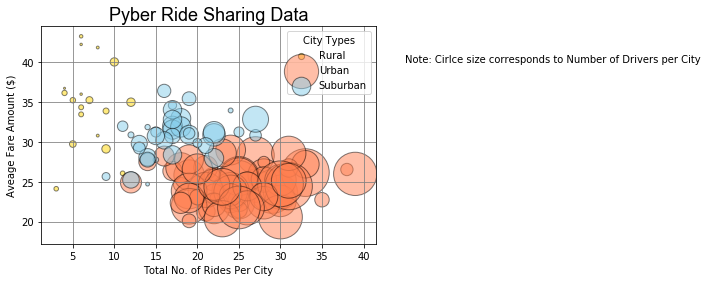

<Figure size 432x288 with 0 Axes>

In [16]:
# Build the scatter plots for each city types

color_color= {"Urban":"coral","Suburban":"skyblue","Rural":"gold"}

plt.scatter(x=rural['x'],y=rural['y'],s=rural['z'],marker= "o",facecolors="gold", edgecolor="black", label="Rural", alpha=0.5, linewidth=1)
plt.scatter(x=urban['x'],y=urban['y'],s=urban['z'], marker="o", facecolors="coral",edgecolor ="black", label="Urban",alpha=0.5, linewidth=1)
plt.scatter(x=suburban['x'],y=suburban['y'],s=suburban['z'], marker="o",facecolors="skyblue",edgecolor="black",label="Suburban",alpha=0.5, linewidth=1)

plt.title("Pyber Ride Sharing Data",{"fontname":"Arial","fontsize":18})
plt.xlabel("Total No. of Rides Per City")
plt.ylabel("Aveage Fare Amount ($)")
plt.grid(color="gray")

# Create a legend
plt.legend(loc="best", title="City Types")


# Incorporate a text label regarding circle size
plt.text(45,40, "Note: Cirlce size corresponds to Number of Drivers per City")

#Show Figure
plt.show()

# Save Figure
plt.savefig("HomeworkSP.png")

## Total Fares by City Type

In [17]:
# Calculate Type Percents
Type_percents = pyber_data.groupby(["type"]).sum()["fare"] / pyber_data["fare"].sum()*100
Type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

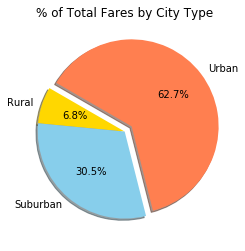

In [18]:
# Build Pie Chart
plt.pie(Type_percents, labels=["Rural","Suburban","Urban"], colors=["gold","Skyblue","Coral"], 
        explode=[0,0,0.1], startangle=150, 
        shadow=True,autopct="%1.1f%%")

plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("HomeworkPie1.png")

## Total Rides by City Type

In [19]:
# Calculate Ride Percents
Ride_percents = pyber_data.groupby(["type"]).sum()["ride_id"] / pyber_data["ride_id"].sum()*100
Ride_percents

type
Rural        5.005212
Suburban    26.766722
Urban       68.228066
Name: ride_id, dtype: float64

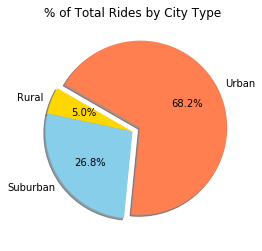

<Figure size 432x288 with 0 Axes>

In [20]:
# Build Pie Chart
plt.pie(Ride_percents, labels=["Rural","Suburban","Urban"], colors=["gold","Skyblue","Coral"], 
        explode=[0,0,0.1], startangle=150, 
        shadow=True,autopct="%1.1f%%")

plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("HomeworkPie2.png")

## Total Drivers by City Type

In [21]:
# Calculate Driver Percents
Drive_percents = pyber_data.groupby(["type"]).sum()["driver_count"]/pyber_data["driver_count"].sum()*100
Drive_percents

type
Rural        0.781557
Suburban    12.472893
Urban       86.745550
Name: driver_count, dtype: float64

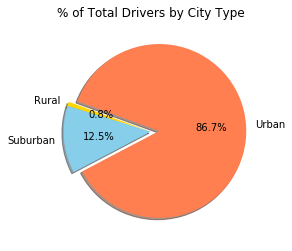

In [22]:
# Build Pie Chart
plt.pie(Drive_percents, labels=["Rural","Suburban","Urban"], colors=["gold","Skyblue","Coral"], 
        explode=[0,0,0.1], startangle=160, 
        shadow=True,autopct="%1.1f%%")

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("HomeworkPie3.png")

#Show Figure
plt.show()